In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/Retail_Sales_Dataset_(1).csv")

In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.drop_duplicates()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


## Convert 'Date' Column


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


## Create Age Groups

### Subtask:
Categorize the 'Age' column into meaningful age ranges (e.g., 18-25, 26-35, 36-45, 46-55, 56-65, 65+) to facilitate demographic analysis.


In [7]:
bins = [18, 25, 35, 45, 55, 65, float('inf')]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['Age Group'].value_counts()

,count
Age Group,
46-55,225
56-65,216
36-45,207
26-35,203
18-25,149
65+,0


## Extract Time Features

### Subtask:
From the 'Date' column, extract and create new columns for 'Day of Week', 'Month', and 'Quarter' to analyze seasonality and trends.


In [8]:
df['Day of Week'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()
df['Quarter'] = df['Date'].dt.quarter
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Group,Day of Week,Month,Quarter
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,26-35,Friday,November,4
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,26-35,Monday,February,1
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,46-55,Friday,January,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,36-45,Sunday,May,2
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,26-35,Saturday,May,2


## Aggregate Sales by Key Dimensions

### Subtask:
Group the DataFrame by 'Date', 'Product Category', 'Customer ID', and 'Gender' to sum 'Total Amount' and 'Quantity', providing insights into sales patterns across these dimensions.


In [9]:
aggregated_sales = df.groupby(['Date', 'Product Category', 'Customer ID', 'Gender']).agg({
    'Total Amount': 'sum',
    'Quantity': 'sum'
}).reset_index()

print(aggregated_sales.head())

        Date Product Category Customer ID  Gender  Total Amount  Quantity
0 2023-01-01           Beauty     CUST522    Male          1500         3
1 2023-01-01         Clothing     CUST180    Male           900         3
2 2023-01-01         Clothing     CUST559  Female          1200         4
3 2023-01-02           Beauty     CUST979  Female            25         1
4 2023-01-02         Clothing     CUST163  Female           150         3


## Analyze Monthly Sales Trends

### Subtask:
Group the DataFrame by month (extracted from the 'Date' column) and calculate the total 'Total Amount' to identify monthly sales trends. Visualize the monthly sales trends using a line plot with appropriate labels and title.


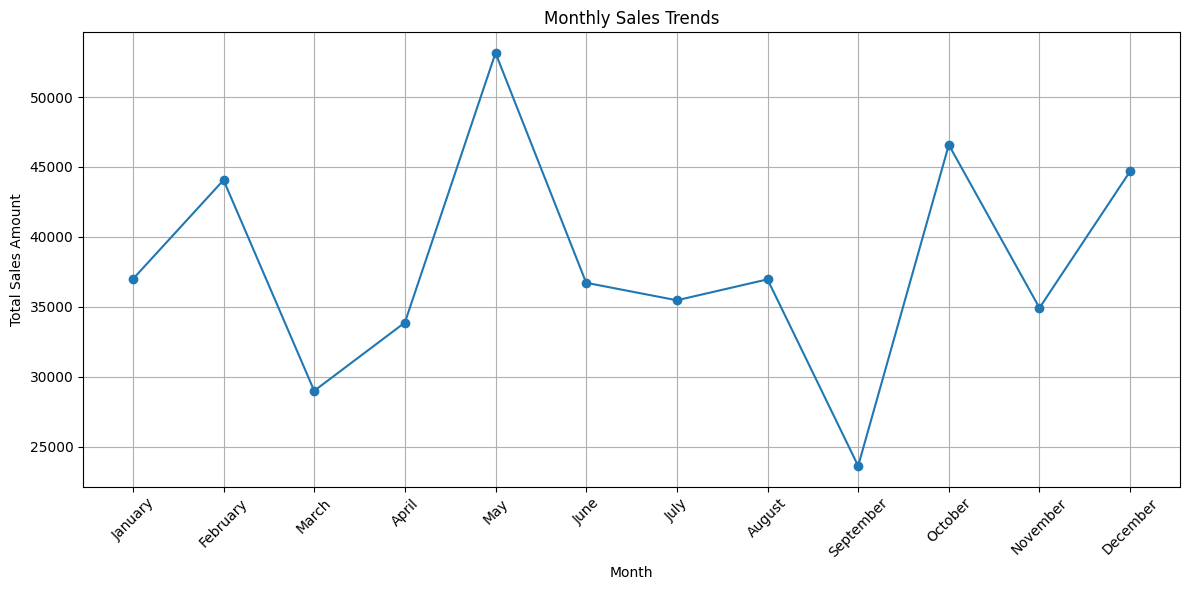

In [10]:
import matplotlib.pyplot as plt

monthly_sales = df.groupby('Month')['Total Amount'].sum().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Calculate Average Transaction Value

### Subtask:
Compute the overall average of 'Total Amount' to determine the average transaction value across all sales.


In [11]:
average_transaction_value = df['Total Amount'].mean()
print(f"Overall Average Transaction Value: {average_transaction_value:.2f}")

Overall Average Transaction Value: 456.00


## Calculate Quantity Sold per Product Category

### Subtask:
Group the DataFrame by 'Product Category' and sum the 'Quantity' to understand which product categories have the highest and lowest sales volumes. Visualize the quantity sold per product category using a bar chart with appropriate labels and title.


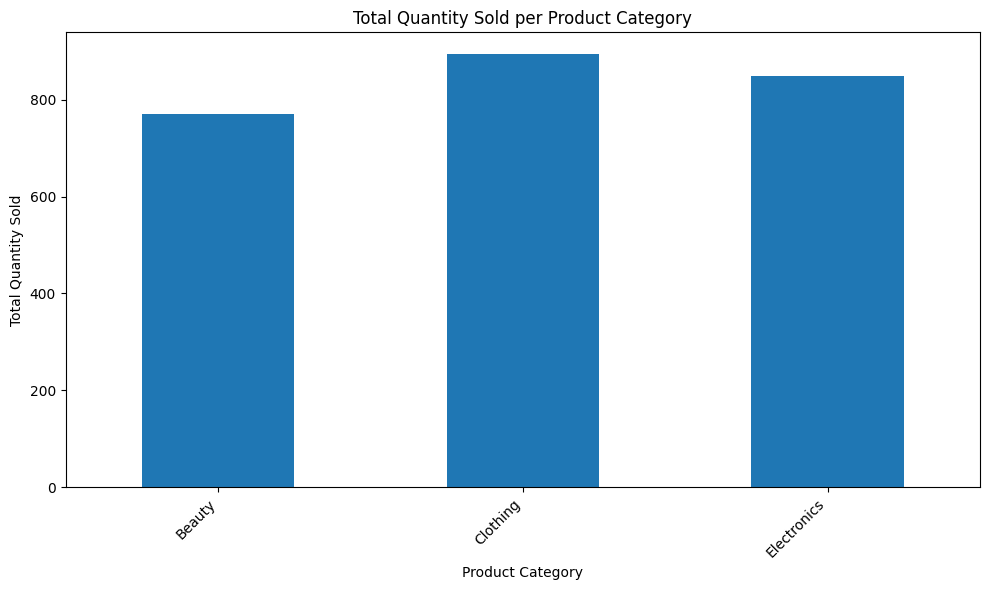

In [12]:
product_category_quantity = df.groupby('Product Category')['Quantity'].sum()

plt.figure(figsize=(10, 6))
product_category_quantity.plot(kind='bar')
plt.title('Total Quantity Sold per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze Total Revenue by Customer Demographics

### Subtask:
Group the DataFrame by 'Gender' and 'Age Group' to calculate the total 'Total Amount', providing insights into revenue generated from different customer demographics. Visualize total revenue by gender and age group using bar charts with appropriate labels and titles, and legends.


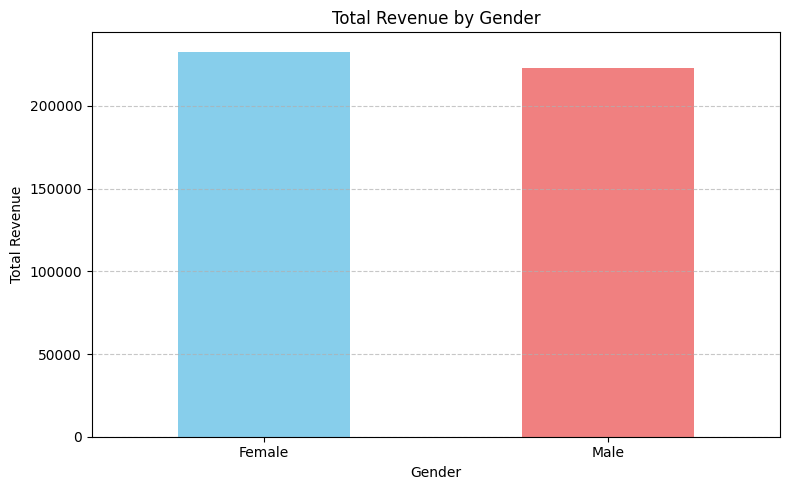

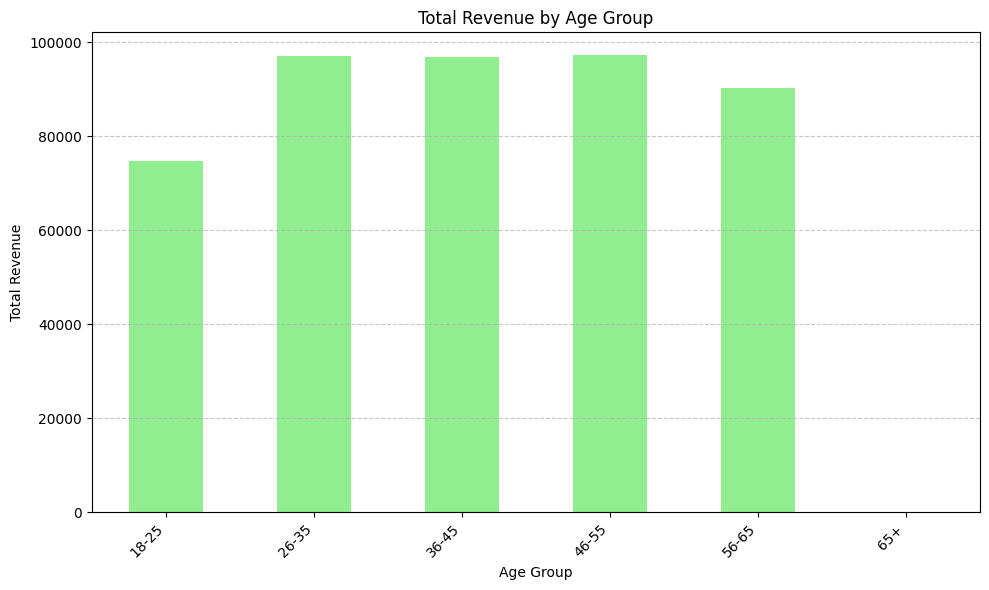

In [14]:
import matplotlib.pyplot as plt

# Group by Gender and calculate total revenue
revenue_by_gender = df.groupby('Gender')['Total Amount'].sum()

# Plot Total Revenue by Gender
plt.figure(figsize=(8, 5))
revenue_by_gender.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Total Revenue by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Group by Age Group and calculate total revenue
# Ensure age groups are ordered correctly for plotting
age_group_order = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
revenue_by_age_group = df.groupby('Age Group', observed=False)['Total Amount'].sum().reindex(age_group_order)

# Plot Total Revenue by Age Group
plt.figure(figsize=(10, 6))
revenue_by_age_group.plot(kind='bar', color='lightgreen')
plt.title('Total Revenue by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Prepare Data for Random Forest

### Subtask:
Select relevant features, handle categorical variables through one-hot encoding, and split the data into training and testing sets for the Random Forest model. We will focus on predicting 'Total Amount'.


In [15]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Define features (X) and target variable (y)
features = ['Gender', 'Age Group', 'Product Category', 'Quantity', 'Day of Week', 'Month', 'Quarter']
X = df[features]
y = df['Total Amount']

# 2. Identify categorical features
categorical_features = ['Gender', 'Age Group', 'Product Category', 'Day of Week', 'Month']

# 3. Apply one-hot encoding to categorical features
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("First 5 rows of X_encoded:")
print(X_encoded.head())

Shape of X_train: (800, 27)
Shape of X_test: (200, 27)
Shape of y_train: (800,)
Shape of y_test: (200,)
First 5 rows of X_encoded:
   Quantity  Quarter  Gender_Male  Age Group_26-35  Age Group_36-45  \
0         3        4         True             True            False   
1         2        1        False             True            False   
2         1        1         True            False            False   
3         1        2         True            False             True   
4         2        2         True             True            False   

   Age Group_46-55  Age Group_56-65  Age Group_65+  Product Category_Clothing  \
0            False            False          False                      False   
1            False            False          False                       True   
2             True            False          False                      False   
3            False            False          False                       True   
4            False            False  

## Train Random Forest Regressor

### Subtask:
Train a Random Forest Regressor model using the prepared training data. This model will learn the patterns and relationships between features and the 'Total Amount'.


In [16]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


## Evaluate Random Forest Model

### Subtask:
Evaluate the trained Random Forest model's performance using metrics such as Mean Absolute Error (MAE) and R-squared on the test set. Visualize the model's predictions against the actual values to assess its accuracy.


Mean Absolute Error (MAE): 427.51
R-squared (R2) Score: 0.02


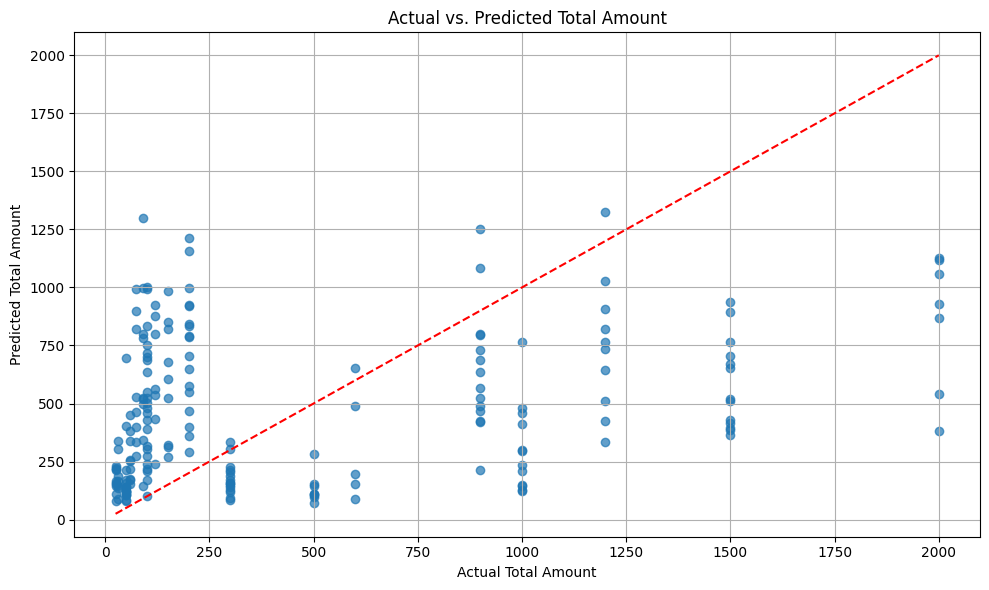

In [17]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.2f}")

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Diagonal line for perfect predictions
plt.title('Actual vs. Predicted Total Amount')
plt.xlabel('Actual Total Amount')
plt.ylabel('Predicted Total Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

## Forecast Future Sales

### Subtask:
Utilize the trained Random Forest model to forecast future sales trends based on product category, customer demographics, and seasonal features. We will simulate future dates if necessary and apply the model.


In [18]:
import pandas as pd

# 1. Create a new Pandas DataFrame named X_future_raw that simulates future sales scenarios
X_future_raw = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Age Group': ['26-35', '36-45', '18-25', '46-55', '56-65'],
    'Product Category': ['Electronics', 'Clothing', 'Beauty', 'Electronics', 'Clothing'],
    'Quantity': [2, 1, 3, 4, 2],
    'Day of Week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
    'Month': ['January', 'February', 'March', 'April', 'May'],
    'Quarter': [1, 1, 1, 2, 2]
})

# 2. Apply one-hot encoding to X_future_raw and reindex to match training data columns
categorical_features = ['Gender', 'Age Group', 'Product Category', 'Day of Week', 'Month']
X_future_encoded = pd.get_dummies(X_future_raw, columns=categorical_features, drop_first=True)

# Align columns with the training data's encoded features (X_encoded)
X_future_encoded = X_future_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# 3. Use the trained rf_model to predict the 'Total Amount' for the X_future_encoded data
future_predictions = rf_model.predict(X_future_encoded)

# 4. Add the predicted 'Total Amount' as a new column to the X_future_raw DataFrame
X_future_raw['Predicted Total Amount'] = future_predictions

# 5. Print the X_future_raw DataFrame to display the simulated future sales and their corresponding forecasts
print("Simulated Future Sales with Predicted Total Amount:")
print(X_future_raw)


Simulated Future Sales with Predicted Total Amount:
   Gender Age Group Product Category  Quantity Day of Week     Month  Quarter  \
0    Male     26-35      Electronics         2      Monday   January        1   
1  Female     36-45         Clothing         1     Tuesday  February        1   
2    Male     18-25           Beauty         3   Wednesday     March        1   
3  Female     46-55      Electronics         4    Thursday     April        2   
4    Male     56-65         Clothing         2      Friday       May        2   

   Predicted Total Amount  
0              703.600000  
1              201.720000  
2              304.175000  
3              623.750000  
4              679.633333  


## Prepare Data for Clustering

### Subtask:
Aggregate sales data by 'Customer ID', prepare one-hot encoded product category features for each customer, and scale the numerical features to prepare for clustering.


In [19]:
customer_segmentation_df = df.groupby('Customer ID').agg(
    Total_Amount=('Total Amount', 'sum'),
    Quantity=('Quantity', 'sum'),
    Unique_Product_Categories_Count=('Product Category', 'nunique')
).reset_index()

print("Aggregated Sales Data by Customer ID:")
print(customer_segmentation_df.head())

Aggregated Sales Data by Customer ID:
  Customer ID  Total_Amount  Quantity  Unique_Product_Categories_Count
0     CUST001           150         3                                1
1     CUST002          1000         2                                1
2     CUST003            30         1                                1
3     CUST004           500         1                                1
4     CUST005           100         2                                1


## Prepare Data for Clustering

### Subtask:
Generate one-hot encoded product category features for each customer, merge them with the aggregated sales data, and then scale the numerical features (`Total_Amount`, `Quantity`, `Unique_Product_Categories_Count`, and the one-hot encoded product category counts) using `StandardScaler` to ensure all features contribute equally to the clustering process.


In [20]:
customer_product_category_dummies = df.groupby(['Customer ID', 'Product Category']).size().unstack(fill_value=0)
print("One-hot encoded product categories per customer:")
print(customer_product_category_dummies.head())

One-hot encoded product categories per customer:
Product Category  Beauty  Clothing  Electronics
Customer ID                                    
CUST001                1         0            0
CUST002                0         1            0
CUST003                0         0            1
CUST004                0         1            0
CUST005                1         0            0


In [21]:
customer_segmentation_df = pd.merge(customer_segmentation_df,
                                    customer_product_category_dummies,
                                    on='Customer ID',
                                    how='left')

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_cols = ['Total_Amount', 'Quantity', 'Unique_Product_Categories_Count'] + list(customer_product_category_dummies.columns)
customer_segmentation_df[numerical_cols] = scaler.fit_transform(customer_segmentation_df[numerical_cols])

print("Merged and Scaled Customer Segmentation DataFrame:")
print(customer_segmentation_df.head())

Merged and Scaled Customer Segmentation DataFrame:
  Customer ID  Total_Amount  Quantity  Unique_Product_Categories_Count  \
0     CUST001     -0.546704  0.429265                              0.0   
1     CUST002      0.971919 -0.453996                              0.0   
2     CUST003     -0.761098 -1.337258                              0.0   
3     CUST004      0.078611 -1.337258                              0.0   
4     CUST005     -0.636035 -0.453996                              0.0   

     Beauty  Clothing  Electronics  
0  1.502441 -0.735413    -0.720942  
1 -0.665584  1.359780    -0.720942  
2 -0.665584 -0.735413     1.387075  
3 -0.665584  1.359780    -0.720942  
4  1.502441 -0.735413    -0.720942  


## Determine Optimal Number of Clusters (K)

### Subtask:
Use methods like the Elbow Method or Silhouette Score to determine the optimal number of clusters for the K-Means algorithm based on the prepared data.


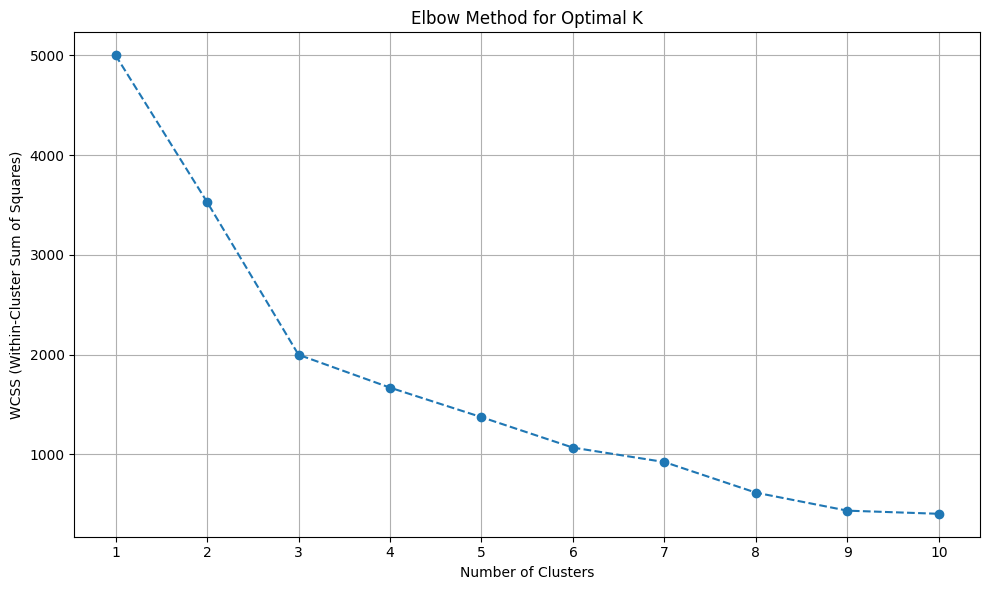

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Exclude 'Customer ID' for clustering
X_for_clustering = customer_segmentation_df.drop('Customer ID', axis=1)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=42)
    kmeans.fit(X_for_clustering)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.tight_layout()
plt.show()


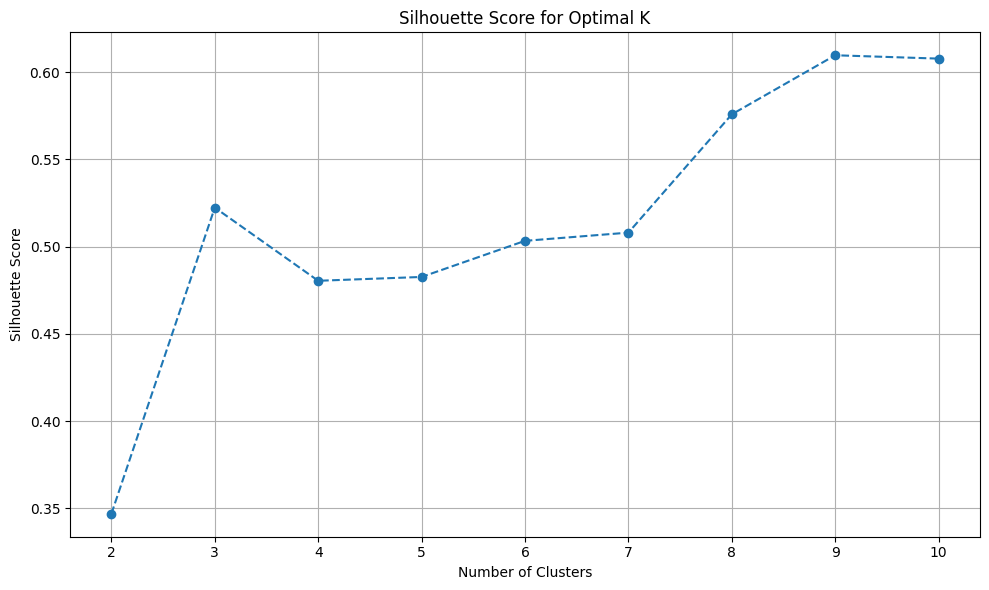

In [23]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=42)
    kmeans.fit(X_for_clustering)
    score = silhouette_score(X_for_clustering, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.tight_layout()
plt.show()


## Apply K-Means Clustering

### Subtask:
Apply the K-Means clustering algorithm to segment customers based on their purchasing behavior, using the optimal K found in the previous step. Assign each customer to their respective cluster.


In [24]:
from sklearn.cluster import KMeans

# Instantiate KMeans with the chosen optimal K (e.g., 3 from visual inspection of elbow/silhouette plots)
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')

# Fit the model to the scaled data
kmeans.fit(X_for_clustering)

# Assign cluster labels to the original customer_segmentation_df
customer_segmentation_df['Cluster'] = kmeans.labels_

print("Distribution of customers across clusters:")
print(customer_segmentation_df['Cluster'].value_counts())

Distribution of customers across clusters:
Cluster
2    351
1    342
0    307
Name: count, dtype: int64


## Analyze Customer Segments

### Subtask:
Characterize each customer segment by analyzing the average values of the clustering features and other relevant demographics like 'Gender' and 'Age Group'. Display the distribution of customers across clusters.


In [25]:
clustered_df = pd.merge(df, customer_segmentation_df[['Customer ID', 'Cluster']], on='Customer ID', how='left')

print("Merged DataFrame with Cluster labels (first 5 rows):")
print(clustered_df.head())

Merged DataFrame with Cluster labels (first 5 rows):
   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount Age Group Day of Week     Month  \
0         3              50           150     26-35      Friday  November   
1         2             500          1000     26-35      Monday  February   
2         1              30            30     46-55      Friday   January   
3         1             500           500     36-45      Sunday       May   
4         2              50           100     26-35    Saturday       May   

   Quarter  Cluster  
0        4       

In [26]:
print("\n--- Average Scaled Feature Values per Cluster ---")
cluster_means = customer_segmentation_df.groupby('Cluster')[numerical_cols].mean()
print(cluster_means)

print("\n--- Gender Distribution per Cluster ---")
gender_distribution = clustered_df.groupby('Cluster')['Gender'].value_counts(normalize=True).unstack(fill_value=0)
print(gender_distribution)

print("\n--- Age Group Distribution per Cluster ---")
age_group_distribution = clustered_df.groupby('Cluster')['Age Group'].value_counts(normalize=True).unstack(fill_value=0)
print(age_group_distribution)


--- Average Scaled Feature Values per Cluster ---
         Total_Amount  Quantity  Unique_Product_Categories_Count    Beauty  \
Cluster                                                                      
0            0.020502 -0.002296                              0.0  1.502441   
1            0.004978 -0.027861                              0.0 -0.665584   
2           -0.022783  0.029155                              0.0 -0.665584   

         Clothing  Electronics  
Cluster                         
0       -0.735413    -0.720942  
1       -0.735413     1.387075  
2        1.359780    -0.720942  

--- Gender Distribution per Cluster ---
Gender     Female      Male
Cluster                    
0        0.540717  0.459283
1        0.497076  0.502924
2        0.495726  0.504274

--- Age Group Distribution per Cluster ---
Age Group     18-25     26-35     36-45     46-55     56-65  65+
Cluster                                                         
0          0.172638  0.221498  0.16612

## Visualize Customer Segments

### Subtask:
Create visualizations, such as bar charts or scatter plots, to illustrate the characteristics of each customer segment, highlighting differences in purchasing behavior, preferred product categories, and demographic distributions. Make sure to provide legends to the plots.


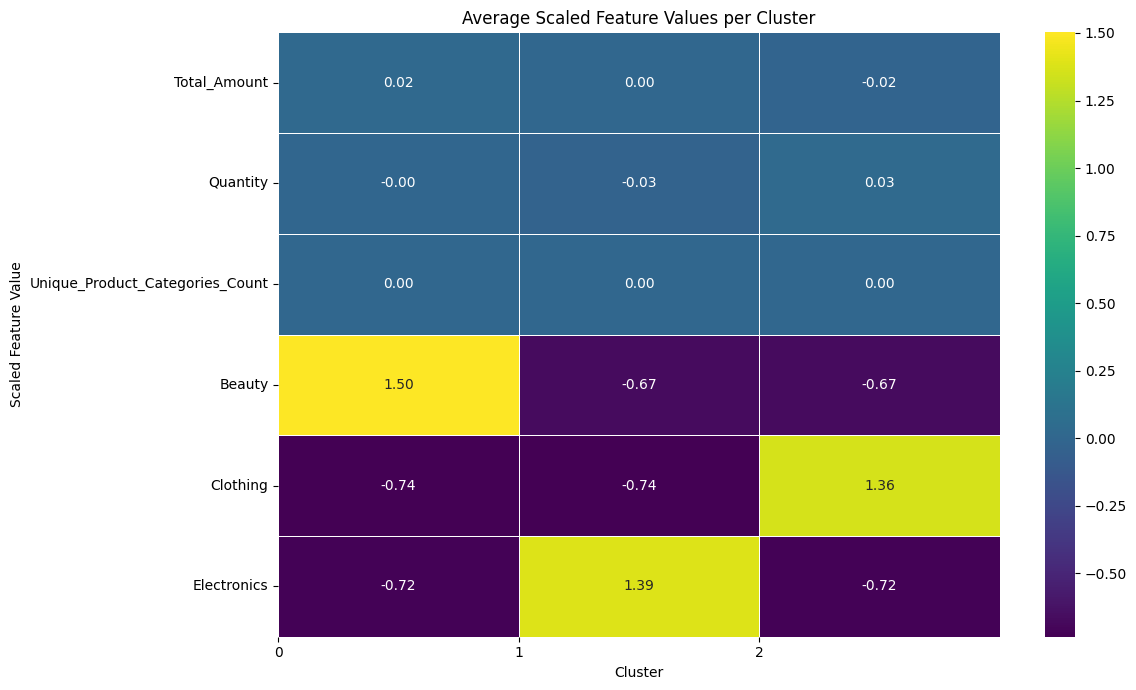

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Create a bar plot to visualize the cluster_means DataFrame
plt.figure(figsize=(12, 7))
sns.heatmap(cluster_means.T, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Average Scaled Feature Values per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Scaled Feature Value')
plt.xticks(ticks=range(len(cluster_means.index)), labels=cluster_means.index)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

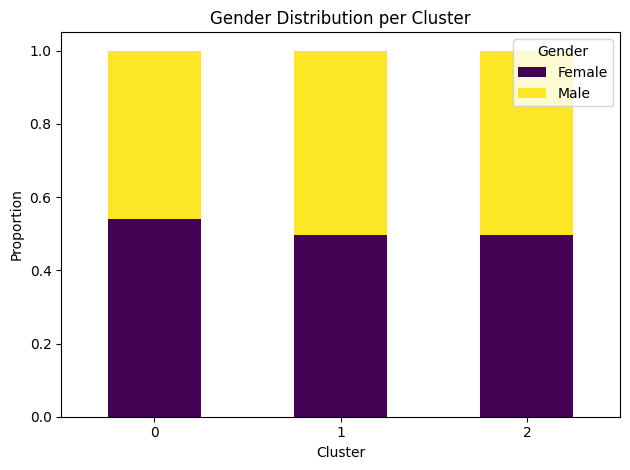

In [28]:
plt.figure(figsize=(10, 6))
gender_distribution.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Gender Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

<Figure size 1200x700 with 0 Axes>

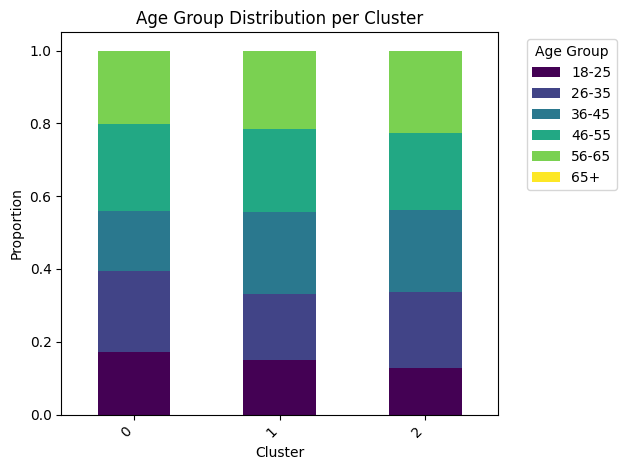

In [29]:
plt.figure(figsize=(12, 7))
age_group_distribution.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Age Group Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Prepare Data for Quantity Prediction

### Subtask:
Select the relevant features ('Gender', 'Age Group', 'Product Category', 'Day of Week', 'Month', 'Quarter') and define 'Quantity' as the new target variable. Apply one-hot encoding to categorical features and split the dataset into training and testing sets for predicting quantity.


In [30]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Define feature columns (X) and target variable (y)
features_quantity = ['Gender', 'Age Group', 'Product Category', 'Day of Week', 'Month', 'Quarter']
X_quantity = df[features_quantity]
y_quantity = df['Quantity']

# 3. Identify categorical features
categorical_features_quantity = ['Gender', 'Age Group', 'Product Category', 'Day of Week', 'Month']

# 4. Apply one-hot encoding to categorical features
X_quantity_encoded = pd.get_dummies(X_quantity, columns=categorical_features_quantity, drop_first=True)

# 5. Split the data into training and testing sets
X_quantity_train, X_quantity_test, y_quantity_train, y_quantity_test = train_test_split(X_quantity_encoded, y_quantity, test_size=0.2, random_state=42)

# 6. Print shapes and first 5 rows
print("Shape of X_quantity_train:", X_quantity_train.shape)
print("Shape of X_quantity_test:", X_quantity_test.shape)
print("Shape of y_quantity_train:", y_quantity_train.shape)
print("Shape of y_quantity_test:", y_quantity_test.shape)
print("First 5 rows of X_quantity_encoded:")
print(X_quantity_encoded.head())

Shape of X_quantity_train: (800, 26)
Shape of X_quantity_test: (200, 26)
Shape of y_quantity_train: (800,)
Shape of y_quantity_test: (200,)
First 5 rows of X_quantity_encoded:
   Quarter  Gender_Male  Age Group_26-35  Age Group_36-45  Age Group_46-55  \
0        4         True             True            False            False   
1        1        False             True            False            False   
2        1         True            False            False             True   
3        2         True            False             True            False   
4        2         True             True            False            False   

   Age Group_56-65  Age Group_65+  Product Category_Clothing  \
0            False          False                      False   
1            False          False                       True   
2            False          False                      False   
3            False          False                       True   
4            False          False  

## Train Random Forest Regressor for Quantity

### Subtask:
Train a Random Forest Regressor model using the prepared training data to predict the 'Quantity' sold.


In [31]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor model for quantity prediction
rf_quantity_model = RandomForestRegressor(random_state=42)

# Train the model
rf_quantity_model.fit(X_quantity_train, y_quantity_train)

print("Random Forest Regressor model for quantity prediction trained successfully.")

Random Forest Regressor model for quantity prediction trained successfully.


## Evaluate Random Forest Quantity Model

### Subtask:
Evaluate the Random Forest model's performance for 'Quantity' prediction using metrics like Mean Absolute Error (MAE) and R-squared on the test set. Visualize the model's predictions against the actual quantity values.


Mean Absolute Error (MAE) for Quantity: 1.10
R-squared (R2) Score for Quantity: -0.29


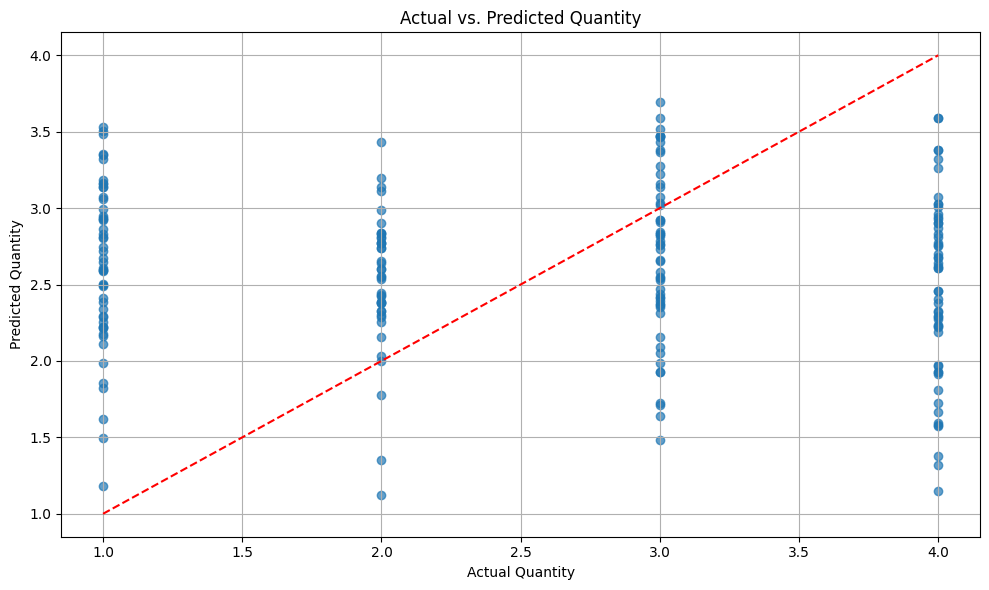

In [32]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Make predictions on the test set
y_quantity_pred = rf_quantity_model.predict(X_quantity_test)

# Calculate Mean Absolute Error (MAE)
mae_quantity = mean_absolute_error(y_quantity_test, y_quantity_pred)
print(f"Mean Absolute Error (MAE) for Quantity: {mae_quantity:.2f}")

# Calculate R-squared score
r2_quantity = r2_score(y_quantity_test, y_quantity_pred)
print(f"R-squared (R2) Score for Quantity: {r2_quantity:.2f}")

# Visualize actual vs. predicted quantity values
plt.figure(figsize=(10, 6))
plt.scatter(y_quantity_test, y_quantity_pred, alpha=0.7)
plt.plot([y_quantity_test.min(), y_quantity_test.max()], [y_quantity_test.min(), y_quantity_test.max()], 'r--') # Diagonal line for perfect predictions
plt.title('Actual vs. Predicted Quantity')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.grid(True)
plt.tight_layout()
plt.show()

## Train Gradient Boosting Machine for Total Amount

### Subtask:
Using the already prepared features (X_encoded) and target ('Total Amount') from the previous Random Forest task, train a Gradient Boosting Machine (GBM) model to predict 'Total Amount'.


In [33]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the GradientBoostingRegressor model
gbm_model = GradientBoostingRegressor(random_state=42)

# Train the model
gbm_model.fit(X_train, y_train)

print("Gradient Boosting Machine model for Total Amount prediction trained successfully.")

Gradient Boosting Machine model for Total Amount prediction trained successfully.


## Evaluate Gradient Boosting Machine Model

### Subtask:
Evaluate the trained Gradient Boosting Machine model's performance using metrics such as Mean Absolute Error (MAE) and R-squared on the test set. Visualize the model's predictions against the actual values to assess its accuracy.

Mean Absolute Error (MAE) for GBM: 452.42
R-squared (R2) Score for GBM: -0.02


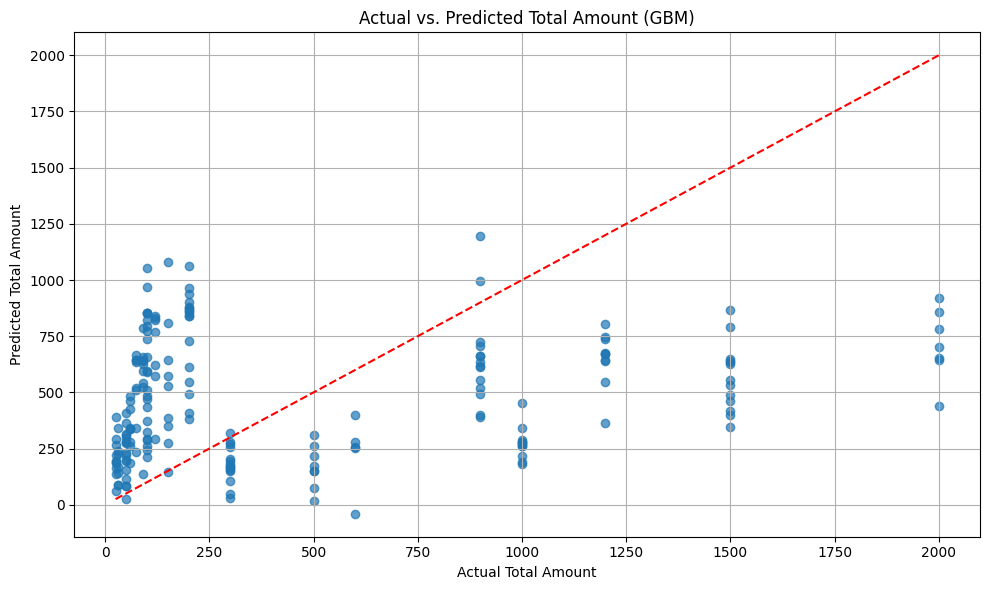

In [34]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Make predictions on the test set using the GBM model
y_pred_gbm = gbm_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
print(f"Mean Absolute Error (MAE) for GBM: {mae_gbm:.2f}")

# Calculate R-squared score
r2_gbm = r2_score(y_test, y_pred_gbm)
print(f"R-squared (R2) Score for GBM: {r2_gbm:.2f}")

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbm, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Diagonal line for perfect predictions
plt.title('Actual vs. Predicted Total Amount (GBM)')
plt.xlabel('Actual Total Amount')
plt.ylabel('Predicted Total Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

## Forecast Future Sales with GBM (Total Amount)

### Subtask:
Utilize the trained Gradient Boosting Machine model to forecast future 'Total Amount' based on simulated sales scenarios, similar to the previous forecasting step, to observe its predictive capability.


In [35]:
import pandas as pd

# 1. Create a new Pandas DataFrame named X_future_raw_gbm that simulates future sales scenarios
X_future_raw_gbm = pd.DataFrame({
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female'],
    'Age Group': ['36-45', '26-35', '46-55', '18-25', '56-65'],
    'Product Category': ['Clothing', 'Electronics', 'Beauty', 'Clothing', 'Electronics'],
    'Quantity': [1, 3, 2, 4, 1],
    'Day of Week': ['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
    'Month': ['June', 'July', 'August', 'September', 'October'],
    'Quarter': [2, 3, 3, 3, 4]
})

# 2. Apply one-hot encoding to X_future_raw_gbm and reindex to match training data columns
categorical_features = ['Gender', 'Age Group', 'Product Category', 'Day of Week', 'Month']
X_future_encoded_gbm = pd.get_dummies(X_future_raw_gbm, columns=categorical_features, drop_first=True)

# Align columns with the training data's encoded features (X_encoded)
X_future_encoded_gbm = X_future_encoded_gbm.reindex(columns=X_encoded.columns, fill_value=0)

# 3. Use the trained gbm_model to predict the 'Total Amount' for the X_future_encoded_gbm data
future_predictions_gbm = gbm_model.predict(X_future_encoded_gbm)

# 4. Add the predicted 'Total Amount' as a new column to the X_future_raw_gbm DataFrame
X_future_raw_gbm['Predicted Total Amount'] = future_predictions_gbm

# 5. Print the X_future_raw_gbm DataFrame to display the simulated future sales and their corresponding forecasts
print("Simulated Future Sales with Predicted Total Amount (GBM):")
print(X_future_raw_gbm)

Simulated Future Sales with Predicted Total Amount (GBM):
   Gender Age Group Product Category  Quantity Day of Week      Month  \
0  Female     36-45         Clothing         1     Tuesday       June   
1    Male     26-35      Electronics         3   Wednesday       July   
2  Female     46-55           Beauty         2    Thursday     August   
3    Male     18-25         Clothing         4      Friday  September   
4  Female     56-65      Electronics         1    Saturday    October   

   Quarter  Predicted Total Amount  
0        2              167.411894  
1        3              543.153746  
2        3              299.935131  
3        3              734.388435  
4        4              409.276656  


## Calculate Customer Frequency and Average Order Value (AOV)

### Subtask:
Calculate the purchase frequency (number of unique transactions) for each customer and their average order value (Total Amount per transaction). Then, merge these new features into the `customer_segmentation_df`.


In [36]:
purchase_frequency_df = df.groupby('Customer ID')['Transaction ID'].nunique().reset_index(name='Purchase_Frequency')

print("Purchase Frequency per Customer:")
print(purchase_frequency_df.head())

Purchase Frequency per Customer:
  Customer ID  Purchase_Frequency
0     CUST001                   1
1     CUST002                   1
2     CUST003                   1
3     CUST004                   1
4     CUST005                   1


In [37]:
average_order_value_df = df.groupby('Customer ID')['Total Amount'].mean().reset_index(name='Average_Order_Value')

print("Average Order Value per Customer:")
print(average_order_value_df.head())

Average Order Value per Customer:
  Customer ID  Average_Order_Value
0     CUST001                150.0
1     CUST002               1000.0
2     CUST003                 30.0
3     CUST004                500.0
4     CUST005                100.0


## Calculate Customer Frequency and Average Order Value (AOV)

### Subtask:
Merge the calculated `Purchase_Frequency` and `Average_Order_Value` into the `customer_segmentation_df`.


In [38]:
customer_segmentation_df = pd.merge(customer_segmentation_df, purchase_frequency_df, on='Customer ID', how='left')
customer_segmentation_df = pd.merge(customer_segmentation_df, average_order_value_df, on='Customer ID', how='left')

print("Customer Segmentation DataFrame with Purchase Frequency and Average Order Value:")
print(customer_segmentation_df.head())

Customer Segmentation DataFrame with Purchase Frequency and Average Order Value:
  Customer ID  Total_Amount  Quantity  Unique_Product_Categories_Count  \
0     CUST001     -0.546704  0.429265                              0.0   
1     CUST002      0.971919 -0.453996                              0.0   
2     CUST003     -0.761098 -1.337258                              0.0   
3     CUST004      0.078611 -1.337258                              0.0   
4     CUST005     -0.636035 -0.453996                              0.0   

     Beauty  Clothing  Electronics  Cluster  Purchase_Frequency  \
0  1.502441 -0.735413    -0.720942        0                   1   
1 -0.665584  1.359780    -0.720942        2                   1   
2 -0.665584 -0.735413     1.387075        1                   1   
3 -0.665584  1.359780    -0.720942        2                   1   
4  1.502441 -0.735413    -0.720942        0                   1   

   Average_Order_Value  
0                150.0  
1               1000.

## Estimate Customer Lifetime Value (CLV)

### Subtask:
Calculate a simplified Customer Lifetime Value (CLV) for each customer using a heuristic formula, for example, by multiplying their Average Order Value by their Purchase Frequency.


In [39]:
customer_segmentation_df['CLV'] = customer_segmentation_df['Average_Order_Value'] * customer_segmentation_df['Purchase_Frequency']

print("Customer Segmentation DataFrame with CLV:")
print(customer_segmentation_df.head())

Customer Segmentation DataFrame with CLV:
  Customer ID  Total_Amount  Quantity  Unique_Product_Categories_Count  \
0     CUST001     -0.546704  0.429265                              0.0   
1     CUST002      0.971919 -0.453996                              0.0   
2     CUST003     -0.761098 -1.337258                              0.0   
3     CUST004      0.078611 -1.337258                              0.0   
4     CUST005     -0.636035 -0.453996                              0.0   

     Beauty  Clothing  Electronics  Cluster  Purchase_Frequency  \
0  1.502441 -0.735413    -0.720942        0                   1   
1 -0.665584  1.359780    -0.720942        2                   1   
2 -0.665584 -0.735413     1.387075        1                   1   
3 -0.665584  1.359780    -0.720942        2                   1   
4  1.502441 -0.735413    -0.720942        0                   1   

   Average_Order_Value     CLV  
0                150.0   150.0  
1               1000.0  1000.0  
2          

## Analyze CLV Distribution

### Subtask:
Examine the distribution of the calculated CLV across all customers using descriptive statistics and a histogram. Identify and display the top customers based on their estimated CLV.


In [40]:
print("Descriptive Statistics for CLV:")
print(customer_segmentation_df['CLV'].describe())

Descriptive Statistics for CLV:
count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: CLV, dtype: float64


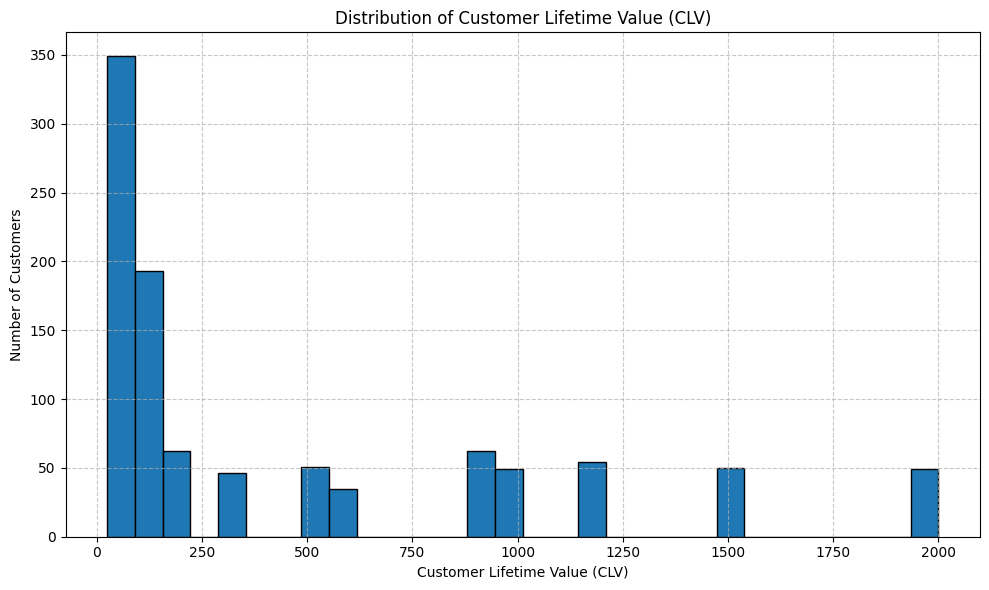

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(customer_segmentation_df['CLV'], bins=30, edgecolor='black')
plt.title('Distribution of Customer Lifetime Value (CLV)')
plt.xlabel('Customer Lifetime Value (CLV)')
plt.ylabel('Number of Customers')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [42]:
print("\nTop 10 Customers by CLV:")
print(customer_segmentation_df[['Customer ID', 'CLV']].sort_values(by='CLV', ascending=False).head(10))


Top 10 Customers by CLV:
    Customer ID     CLV
14      CUST015  2000.0
412     CUST412  2000.0
970     CUST970  2000.0
547     CUST547  2000.0
281     CUST281  2000.0
416     CUST416  2000.0
420     CUST420  2000.0
927     CUST927  2000.0
447     CUST447  2000.0
342     CUST342  2000.0


In [43]:
import pandas as pd

# Save the cleaned DataFrame to a CSV file
df.to_csv('/content/cleaned_retail_sales_data.csv', index=False)

print("Cleaned dataset exported to '/content/cleaned_retail_sales_data.csv'")

Cleaned dataset exported to '/content/cleaned_retail_sales_data.csv'
